In [20]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [21]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('./data/spam.csv', encoding = "ISO-8859-1")
#Had to add the encoding argument as it was throwing some error
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
df.shape

(5572, 5)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# 1) Data Cleaning

In [25]:
# dropping last 3 cols as they were unnamed and useless
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5104,ham,A Boy loved a gal. He propsd bt she didnt mind...
5453,ham,Except theres a chick with huge boobs.
4531,ham,Ok both our days. So what are you making for d...
1243,ham,No shoot me. I'm in the docs waiting room. :/
3927,ham,Babe ? I lost you ... Will you try rebooting ?


In [27]:
from sklearn.preprocessing import LabelEncoder # for encoding
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.head()
# it has encoded ham-0 and spam-1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
# check for duplicate values
df.duplicated().sum()

403

In [30]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

2) Exploratory Data Analysis (EDA)

In [31]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

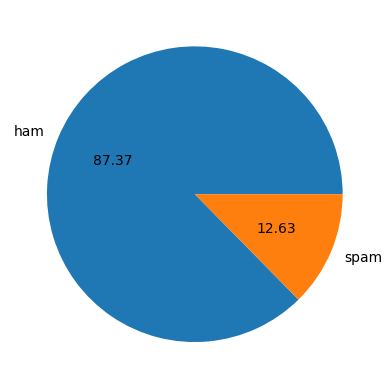

In [32]:
import matplotlib.pyplot as plt ## used for visualisation
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is clearly imbalanced


---



In [33]:
import nltk
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
nltk.download('punkt_tab')
## sentences broken into tokens

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sshiw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [34]:
# num of characters
df['num_characters'] = df['text'].apply(len) # for each row we are calculating number of characters

# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
## This is a function from the Natural Language Toolkit (NLTK) library.
## It tokenizes (splits) the text x into a list of words based on linguistic rules (e.g., handling punctuation, contractions, etc.).

# num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # this is sentence tokeniser

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [36]:
df[['num_characters','num_words','num_sentences']].describe()  # it is describing the new coulumn

,num_characters,num_words,num_sentences
count,5169.00000,5169.000000,5169.000000
mean,79.23196,18.455794,1.965564
std,58.33921,13.324758,1.448541
min,2.00000,1.000000,1.000000
25%,36.00000,9.000000,1.000000
50%,61.00000,15.000000,1.000000
75%,117.00000,26.000000,2.000000
max,910.00000,220.000000,38.000000


In [37]:
# ham=0, go to each row check if its ham and then only give us the description
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.123782,1.820195
std,56.435582,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#spam=1, go to each row and then give count,mean etc
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.346095,27.667688,2.970904
std,30.261787,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

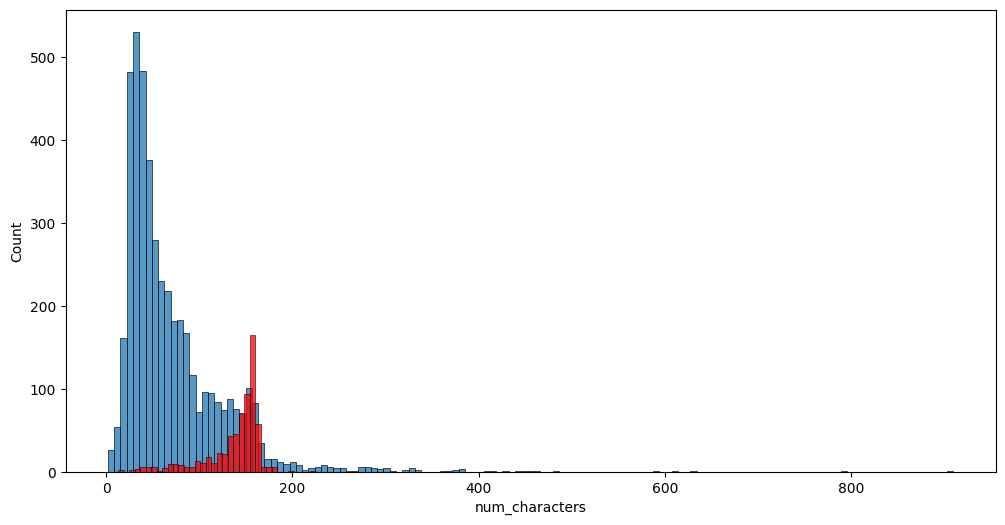

In [39]:
import seaborn as sns
# Data visualisation Module
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
# number of characters in ham is way more than number of charcters in spam

<Axes: xlabel='num_words', ylabel='Count'>

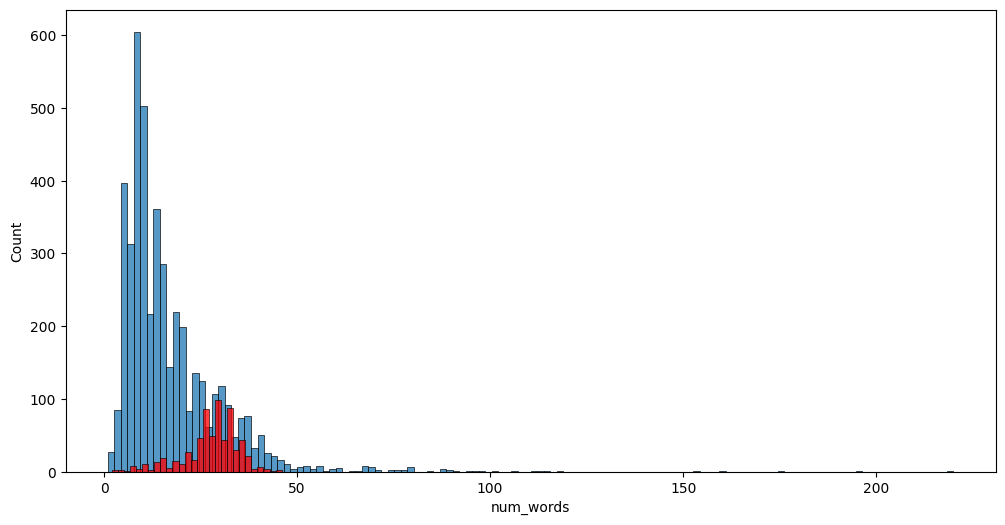

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

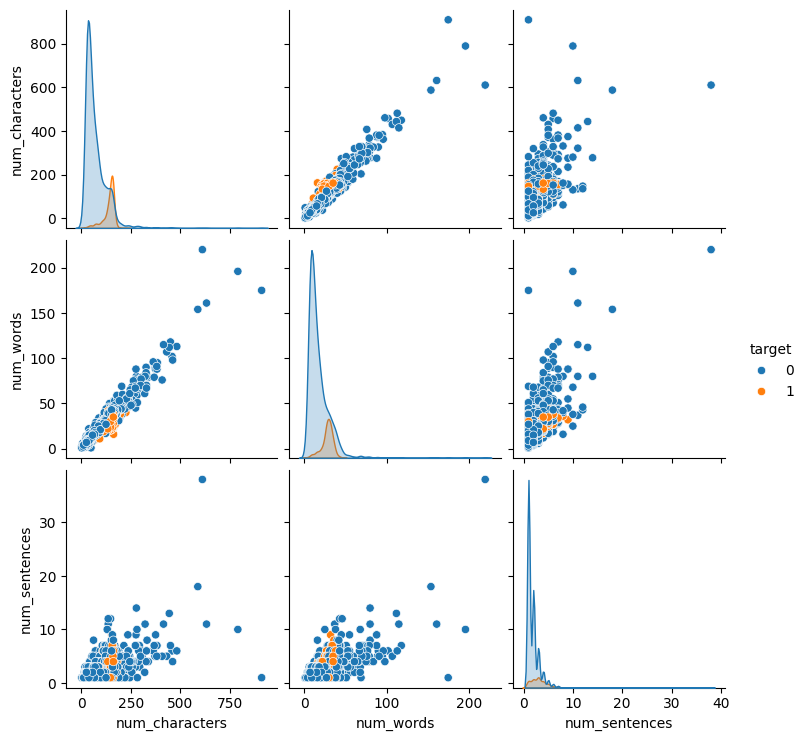

In [41]:
sns.pairplot(df,hue='target')
## comparision of number of sentences to number of words to number of charcters
## the more the number of charcters the more words the more sentences

In [42]:
print(df.dtypes)

target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


<Axes: >

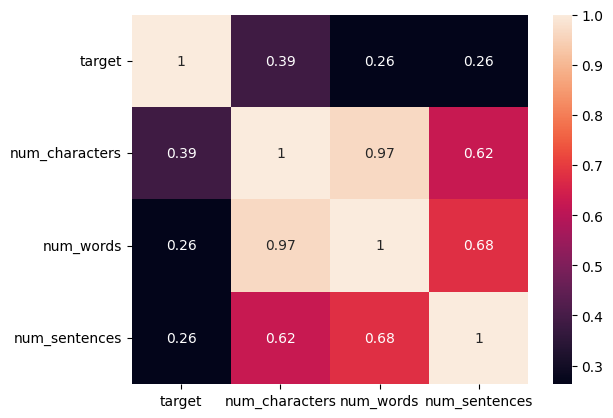

In [43]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)
## The number of characters more then words more is shown by 0.97  relation

# 3. Data Preprocessing


*   Lower case-convert whole to lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming-reducing the words to root form (memory limited therefore reduce text as much as possible)

In [44]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sshiw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
stopwords.words('english') # not very usefull and removing them does not affect the output very much
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [46]:
import string



---


 **transform(text) -----> apply above methods ----> clean data **


text = y:

This creates a reference to the same object in memory.
Modifying text would also modify y, as both refer to the same object.

text = y[:]:

This creates a shallow copy of y.
Modifying text will not affect y, because text is a separate object.


---



In [47]:
def transform_text(text):
    text = text.lower() # lower casing
    text = nltk.word_tokenize(text)  ## tokenising

    y = [] # we removed the special characters
    for i in text:
        if i.isalnum(): # if the charcter is alphanumeric character or not (a-z, 1-9)
            y.append(i)

    text = y[:] # copied y into text with refference to new object
    y.clear()

    for i in text: ## stop word removal
        if i not in stopwords.words('english') and i not in string.punctuation: # if word not in stopword then only copy in final data set
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i)) ## converting to root form


    return " ".join(y)

In [48]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
# we are testing whether function correct implement or not

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [49]:
df['transformed_text'] = df['text'].apply(transform_text) ## would go one by one to each row and apply transform text
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
import wordcloud

In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) # generate wordcloud of all the spam text

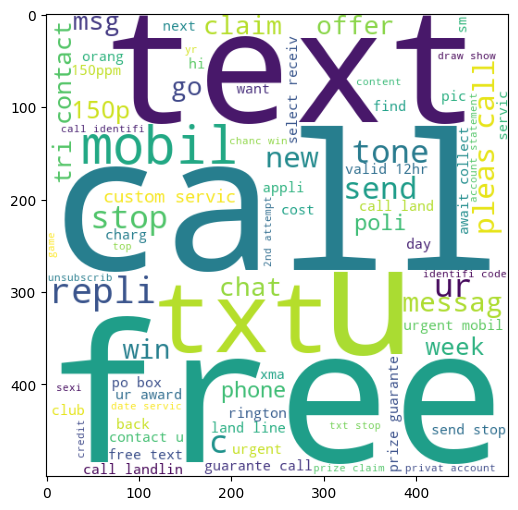

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

# the more the word is repeating in spam the bigger it is

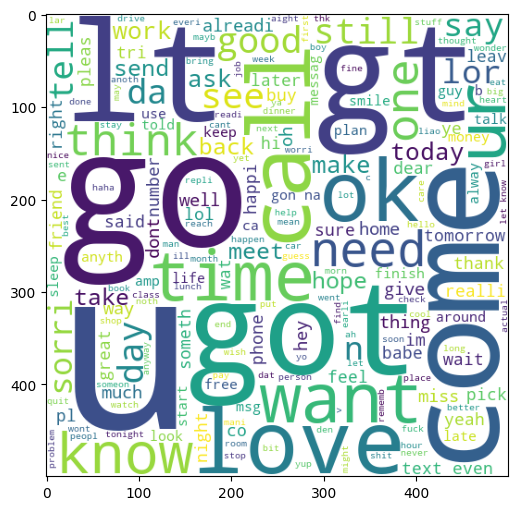

In [53]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) # generate wordcloud of all the ham text

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [54]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

## we are keeping all spams inside different array

In [55]:
len(spam_corpus)
## we have 9939 spam words

9936

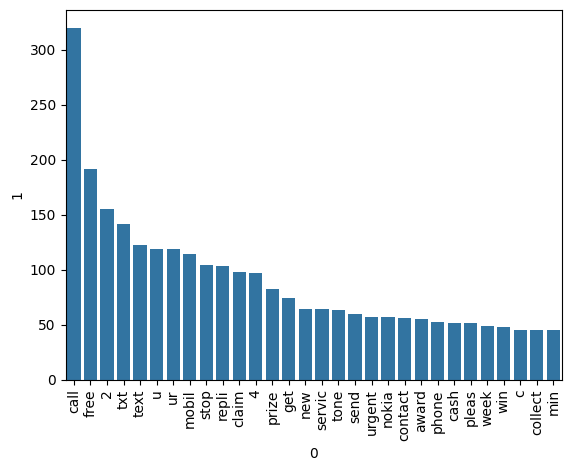

In [56]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## we can see the words to its frequency used in spam mails

In [57]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35305

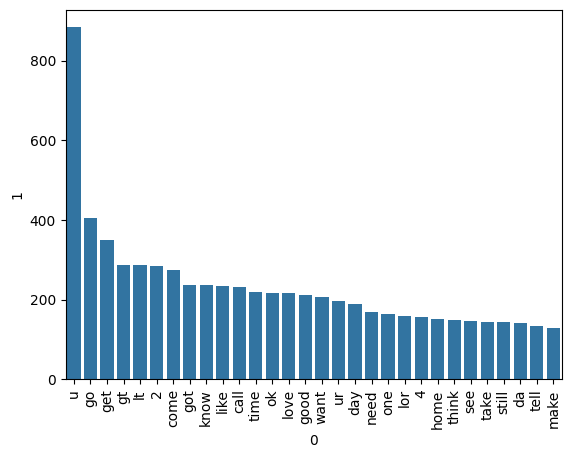

In [59]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)  # each sentence being converted to vector of size 3000, see the x.shape the coulumns max go 3000
## tfidf: termed frequency inverse document frequency
## encoding technique- we have data in form of text , vector form convertion of tokens , vectorisation,embedding called

In [61]:
X = tfidf.fit_transform(df['transformed_text']).toarray() # sentence converted to vectors
y = df['target'].values

In [62]:
X.shape

(5169, 3000)

In [63]:
X[0].shape

(3000,)

In [64]:
y=df['target'].values

In [65]:
print(y)
## converted hama nd spam

[0 0 1 ... 0 0 0]


In [66]:
#commenting out this block as it did not help to improve the model performance

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [67]:
#commenting out this block as it did not help to improve the model performance

# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [87]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [88]:
def evaluate_reg(true, predicted):
    ase = accuracy_score(true, predicted)
    cmx = confusion_matrix(true, predicted)
    pse = precision_score(true, predicted)
    return ase, cmx, pse

In [89]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train-Test sets
    Iterates through the given model dictionary and evaluates the metrics
    Returns: DataFrame containing a report of all models' metrics
    '''
    models_list = []
    accuracy_list = []
    precision_list = []
    confusion_matrices = []

    for i in range(len(list(models))):
        # Get model
        model = list(models.values())[i]
        model_name = list(models.keys())[i]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate Train set
        train_ase, train_cmx, train_pse = evaluate_reg(y_train, y_train_pred)

        # Evaluate Test set
        test_ase, test_cmx, test_pse = evaluate_reg(y_test, y_test_pred)

        # Append model metrics
        models_list.append(model_name)
        accuracy_list.append(test_ase)
        precision_list.append(test_pse)
        confusion_matrices.append(test_cmx)

        # Print model performance
        print(model_name)
        print('Model performance for Training set')
        print(f"- Accuracy: {train_ase:.4f}")
        print(f"- Precision: {train_pse:.4f}")
        print(f"- Confusion Matrix:\n{train_cmx}")
        print('----------------------------------')
        print('Model performance for Test set')
        print(f"- Accuracy: {test_ase:.4f}")
        print(f"- Precision: {test_pse:.4f}")
        print(f"- Confusion Matrix:\n{test_cmx}")
        print('=' * 35)
        print('\n')

    # Create a DataFrame for the report
    report = pd.DataFrame(
        list(zip(models_list, accuracy_list, precision_list, confusion_matrices)),
        columns=['Model Name', 'Accuracy', 'Precision', 'Confusion Matrix']
    ).sort_values(by=['Accuracy'], ascending=False)

    return report


In [90]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "SVC": SVC(),
    "gnb":GaussianNB(),
    "mnb":MultinomialNB(),
    "BernoulliNB":BernoulliNB()
}

if you have time study about this "CatBoosting Classifier": CatBoostClassifier(verbose=False),

In [91]:
base_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Logistic Regression
Model performance for Training set
- Accuracy: 0.9649
- Precision: 0.9843
- Confusion Matrix:
[[3614    6]
 [ 139  376]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9516
- Precision: 0.9783
- Confusion Matrix:
[[894   2]
 [ 48  90]]


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9253
- Precision: 1.0000
- Confusion Matrix:
[[3620    0]
 [ 309  206]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9052
- Precision: 1.0000
- Confusion Matrix:
[[896   0]
 [ 98  40]]


Decision Tree
Model performance for Training set
- Accuracy: 0.9995
- Precision: 1.0000
- Confusion Matrix:
[[3620    0]
 [   2  513]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9478
- Precision: 0.8043
- Confusion Matrix:
[[869  27]
 [ 27 111]]


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9995
- Precision: 1.0000
- Confusion Matrix:
[[3620    0

which of them is best to use and why ? ask this question to gpt by providing the base report
promt = which of them is best to use and why {base report} consider that the data augmentation is not been done so the ham data is 85per and rest is spam data

In [92]:
base_report

,Model Name,Accuracy,Precision,Confusion Matrix
9,BernoulliNB,0.983559,0.991870,"[[895, 1], [16, 122]]"
3,Random Forest Classifier,0.974855,0.974576,"[[893, 3], [23, 115]]"
6,SVC,0.972921,0.982456,"[[894, 2], [26, 112]]"
8,mnb,0.971954,1.000000,"[[896, 0], [29, 109]]"
4,XGBClassifier,0.969052,0.949153,"[[890, 6], [26, 112]]"
5,AdaBoost Classifier,0.969052,0.956897,"[[891, 5], [27, 111]]"
0,Logistic Regression,0.951644,0.978261,"[[894, 2], [48, 90]]"
2,Decision Tree,0.947776,0.804348,"[[869, 27], [27, 111]]"
1,K-Neighbors Classifier,0.905222,1.000000,"[[896, 0], [98, 40]]"
7,gnb,0.873308,0.516129,"[[791, 105], [26, 112]]"


# Hyperparameter Tuning


In [101]:
bernoulli_params = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    'binarize': [0.0, 0.5, 1.0]
}

rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}


Randomized searched cv , grid search cv

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [96]:
randomcv_models = [
    ("BernoulliNB", BernoulliNB(), bernoulli_params),
    ("Random Forest Classifier", RandomForestClassifier(random_state=42), rf_params),
    ("SVC", SVC(probability=True, random_state=42), svc_params)
]

In [99]:
model_param = {}

for name, model, params in randomcv_models:
    print(f"Tuning {name}...")
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=20,  # Reduced from 100 to 20
        cv=2,  # Reduced cross-validation splits
        verbose=1,  # Lower verbosity for readability
        n_jobs=-1,  # Use all available cores
        random_state=42  # Ensure reproducibility
    )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

# Display the best parameters
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Tuning BernoulliNB...
Fitting 2 folds for each of 18 candidates, totalling 36 fits


d:\spam-classifier\env\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuning Random Forest Classifier...
Fitting 2 folds for each of 20 candidates, totalling 40 fits
Tuning SVC...
Fitting 2 folds for each of 20 candidates, totalling 40 fits
---------------- Best Params for BernoulliNB -------------------
{'binarize': 0.0, 'alpha': 0.1}
---------------- Best Params for Random Forest Classifier -------------------
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
---------------- Best Params for SVC -------------------
{'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'C': 10}


In [103]:
model_param

{'BernoulliNB': {'binarize': 0.0, 'alpha': 0.1},
 'Random Forest Classifier': {'n_estimators': 300,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': None,
  'bootstrap': False},
 'SVC': {'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'C': 10}}

In [105]:
models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['Random Forest Classifier'], n_jobs=-1),
    "BernoulliNB": BernoulliNB(**model_param['BernoulliNB']),
    "SVC": SVC(**model_param['SVC'], verbose=False)
}

In [106]:
retrained_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9894
- Precision: 0.9958
- Confusion Matrix:
[[3618    2]
 [  42  473]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9729
- Precision: 0.9508
- Confusion Matrix:
[[890   6]
 [ 22 116]]


BernoulliNB
Model performance for Training set
- Accuracy: 0.9927
- Precision: 0.9959
- Confusion Matrix:
[[3618    2]
 [  28  487]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9884
- Precision: 1.0000
- Confusion Matrix:
[[896   0]
 [ 12 126]]


SVC
Model performance for Training set
- Accuracy: 0.9993
- Precision: 0.9981
- Confusion Matrix:
[[3619    1]
 [   2  513]]
----------------------------------
Model performance for Test set
- Accuracy: 0.9739
- Precision: 0.9440
- Confusion Matrix:
[[889   7]
 [ 20 118]]




## hence the best performing model is BernoulliNB

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB ## we are using three models to compare
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



---
1. **`accuracy_score(y_test, y_pred1)`**: Measures the proportion of correct predictions out of the total predictions.  

2. **`confusion_matrix(y_test, y_pred1)`**: Summarizes prediction performance by showing counts of True Positives, True Negatives, False Positives, and False Negatives.  

3. **`precision_score(y_test, y_pred1)`**: Calculates the proportion of correctly predicted positive cases out of all predicted positives.


---




In [72]:
gnb.fit(X_train,y_train) #step1
y_pred1 = gnb.predict(X_test) # step2
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

# ste1: The model learns the relationship between the features in X_train and their corresponding labels in y_train by estimating probabilities using the Gaussian Naive Bayes algorithm.After this step, the model is ready to make predictions.
# step2 : The model predicts the class labels for each sample in X_test based on the probabilities it has learned during training.Output:y_pred1: An array of predicted class labels for the test set.

0.8733075435203095
[[791 105]
 [ 26 112]]
0.5161290322580645


In [73]:
# doing same for multinomia
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [74]:
# Bernoulli
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187




---


here bernoulli is performing well but initially we saw that there was data imbalance , we had more ham text than spam text and since multinomia has next best score and can handle data imbalance well

tfidf with MNB performed the best so far

---



In [75]:
import pickle # model trained then we can download it locally in computer and pickle files allow us to download , now when we insert values in this local model it gives us output
pickle.dump(tfidf,open('vectorizer.pkl','wb')) # the vector values of sentences
pickle.dump(mnb,open('model.pkl','wb')) # the multinomial values we recieved